# Procesamiento de Lenguaje Natural

El procesamiento de lenguaje natural es el área que analiza las interacciones entre sistemas computacionales y los lenguajes humanos. Se utilizan fuertemente métodos de aprendizaje de máquinas para solucionar los problemas.

In [1]:
import pandas as pd
import sklearn.feature_extraction
import sklearn.model_selection
import sklearn.naive_bayes
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generamos unos ejemplos de juguete para diagnósticos urgentes (1) y no-urgentes (0).

urg_text = [
    "fractura de cadera con dolor",
    "dolor de pie por fractura",
    "pericoronaritis en 4.8 y 3.8 con dolor",
    "fractura coronaria COMPLICADA en diente 1.1-2.1 con dolor",
    "dolor fulgurante en diente 4.6 y dolor opresivo en diente 1.1",
    "Fractura de húmero y peroné",
    
    "Hipertensión-arterial y enfermedad renal crónica",
    "periodontitis crónica localizada en diente 4.4 y diente 3.1",
    "Enfermedad pulmonar obstructiva crónica",
    "amalgama desajustada y periodontitis crónica diente 3.5",
    "presencia de abundante sarro en diente 6.3 con periodontitis crónica",
    "diabetes Melitus y enfermedad renal crónica"
]
urg_label = [
    1,
    1,
    1,
    1,
    1,
    1,
    
    0,
    0,
    0,
    0,
    0,
    0
]

## Preprocesamiento

In [3]:
def preprocessor(x):
    """
    Esta función recibe un string y retorna un string procesado.
    """
    normalized_x = x.lower()
    return normalized_x

La tokenización es el proceso de separar cadenas de caracteres en secciones más pequeñas, como palabras u oraciones.

In [4]:
def tokenizer(x):
    """
    Esta función recibe un string y retorna una lista de tokens.
    """
    tokenized_x = x.split(" ")
    return tokenized_x

In [5]:
cv = sklearn.feature_extraction.text.CountVectorizer( # Con esta clase podemos crear un vectorizador 
                                                      # que convierte nuestros documentos en bolsas de palabras.
    preprocessor=preprocessor, # Utilizamos nuestra función para preprocesar los string.
    tokenizer=tokenizer # Utilzamos nuestra función para tokenizar los string.
)
features = cv.fit_transform(urg_text) # Entrenamos nuestro vectorizados y transformamos nuestros documentos en bolsas de palabras.

El vocabulario son todas las palabras distintas presentes en nuestra colección de documentos (_corpus_).

In [6]:
cv.vocabulary_ # Este es el vocabulario de nuestroc corpus.

{'fractura': 23,
 'de': 16,
 'cadera': 11,
 'con': 13,
 'dolor': 20,
 'pie': 34,
 'por': 35,
 'pericoronaritis': 31,
 'en': 21,
 '4.8': 7,
 'y': 40,
 '3.8': 4,
 'coronaria': 14,
 'complicada': 12,
 'diente': 19,
 '1.1-2.1': 1,
 'fulgurante': 24,
 '4.6': 6,
 'opresivo': 30,
 '1.1': 0,
 'húmero': 26,
 'peroné': 33,
 'hipertensión-arterial': 25,
 'enfermedad': 22,
 'renal': 38,
 'crónica': 15,
 'periodontitis': 32,
 'localizada': 27,
 '4.4': 5,
 '3.1': 2,
 'pulmonar': 37,
 'obstructiva': 29,
 'amalgama': 10,
 'desajustada': 17,
 '3.5': 3,
 'presencia': 36,
 'abundante': 9,
 'sarro': 39,
 '6.3': 8,
 'diabetes': 18,
 'melitus': 28}

### Actividad 1
Las stopwords son palabras que no aportan semántica a las oraciones y es una práctica habitual eliminarlas del _corpus_. Además, normalmente se eliminan de los corpora los signos de puntuación para disminuir el tamaño del vocabulario.

**Programa la función `tokenizer()` para que elimine stopwords y `preprocessor()` para que elimine caracteres no alfabéticos.**

In [7]:
features.shape # El tamaño de nuestra matriz de bolsas de palabras es (<número de documentos>, <tamaño del vocabulario>)

(12, 41)

In [8]:
# Convertimos nuestra matriz de bolsas de palabras a pd.DataFrame
data = pd.DataFrame(
    features.todense(),
    columns=sorted(cv.vocabulary_)
)
data["label"] = urg_label
data["text"] = urg_text

In [9]:
data

,1.1,1.1-2.1,3.1,3.5,3.8,4.4,4.6,4.8,6.3,abundante,...,peroné,pie,por,presencia,pulmonar,renal,sarro,y,label,text
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,fractura de cadera con dolor
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,dolor de pie por fractura
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,pericoronaritis en 4.8 y 3.8 con dolor
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,fractura coronaria COMPLICADA en diente 1.1-2....
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,dolor fulgurante en diente 4.6 y dolor opresiv...
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,Fractura de húmero y peroné
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,Hipertensión-arterial y enfermedad renal crónica
7,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,periodontitis crónica localizada en diente 4.4...
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Enfermedad pulmonar obstructiva crónica
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,amalgama desajustada y periodontitis crónica d...


# (Opcional) Word embeddings

Los word embeddings son representaciones vectoriales densas (un vector de números reales con todos sus elementos significativos) de palabras.

Estas representaciones logran transferir la semántica hacia un espacio vectorial. Palabras semánticamente similares se encuentras cercanas en el espacio vectorial, por dar un ejemplo.

Acá descargaremos unos embeddings del español clínico calculados usando word2vec y lo cargaremos para poder usarlo.

In [10]:
# !pip install gensim
# import gensim
# import requests
# response = requests.get("https://zenodo.org/record/6647060/files/mix.vec?download=1")
# open("data/mix.vec", "wb").write(response.content)
# mix = gensim.models.KeyedVectors.load_word2vec_format("data/mix.vec")

Acá podemos ver cuáles son las palabras más cercanas a la palabra diente:

In [11]:
# mix.most_similar("diente")

# Ejemplo de salida

# [('dientes', 0.7044694423675537),
#  ('dentario', 0.6958664655685425),
#  ('deciduo', 0.6901371479034424),
#  ('dentaria', 0.6852759122848511),
#  ('dental', 0.6720070838928223),
#  ('erupcionado', 0.6636360287666321),
#  ('incisivo', 0.6524955034255981),
#  ('paramolar', 0.6437616348266602),
#  ('caduco', 0.6282373070716858),
#  ('hipercementosis', 0.6143868565559387)]

Este es el vector asociado a la palabra diente:

In [12]:
# mix["diente"]

# Ejemplo de salida

# array([-2.61572e-01, -9.19244e-01, -4.49040e-01, -6.52679e-01,
#        -2.37828e-01, -4.24800e-03,  1.17959e-01, -4.17320e-02,
#        -1.21898e-01,  4.81022e-01, -5.98089e-01,  4.93167e-01,
#        -2.22465e-01, -6.13813e-01, -3.75325e-01, -2.72082e-01,
# ...
#         4.82690e-02,  2.83641e-01, -3.47008e-01, -9.39630e-02,
#         5.71168e-01, -3.27347e-01, -1.42970e-02,  1.76594e-01,
#        -4.12890e-02,  2.99369e-01, -4.22107e-01,  1.86065e-01,
#        -4.88600e-03,  4.47510e-02,  4.93230e-02, -3.57540e-02,
#        -1.50310e-01, -1.17570e-01,  4.81692e-01,  3.00510e-02],
#       dtype=float32)

Al tener una representación vectorial de cada palabra. **¿Cómo podríamos representar un documento (secuencia de palabras) completo?**

## Modelamiento

In [13]:
nb = sklearn.naive_bayes.MultinomialNB() # Instanciamos un algoritmo de Naïve Bayes.
nb.fit( # Entrenamos un modelo de Naïve Bayes.
    features,
    urg_label
)

MultinomialNB()

Al entrenar un modelo de Naïve Bayes podemos obtener las palabras que mayor aportan a la decisión de clasificación, estas son las 10 con mayor aporte.

In [14]:
pd.DataFrame(list(zip(sorted(cv.vocabulary_),nb.coef_[0]))).sort_values(1,ascending=False).head(10)

C:\Users\ville\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


,0,1
20,dolor,-2.460809
23,fractura,-2.797281
21,en,-2.797281
13,con,-3.020425
19,diente,-3.020425
16,de,-3.020425
40,y,-3.020425
7,4.8,-3.713572
4,3.8,-3.713572
35,por,-3.713572


### Actividad 2
Naïve Bayes no es el único algoritmo para entrenar un modelo de clasificación.

**Entrena otro modelo de clasificación**

In [15]:
# TODO: Entrenar un modelo de clasificación utilizando un algoritmo distinto a Naïve Bayes


## Clasificación de Especialidades

La lista de espera chilena no-GES es un conjunto de solicitudes de interconsulta que aún no se encuentran resueltos. Normalmente estas solicitudes provienen desde atención primaria para referir la atención de un paciente hacia una especialidad de atención secundaria. El flujo de información es el siguiente:

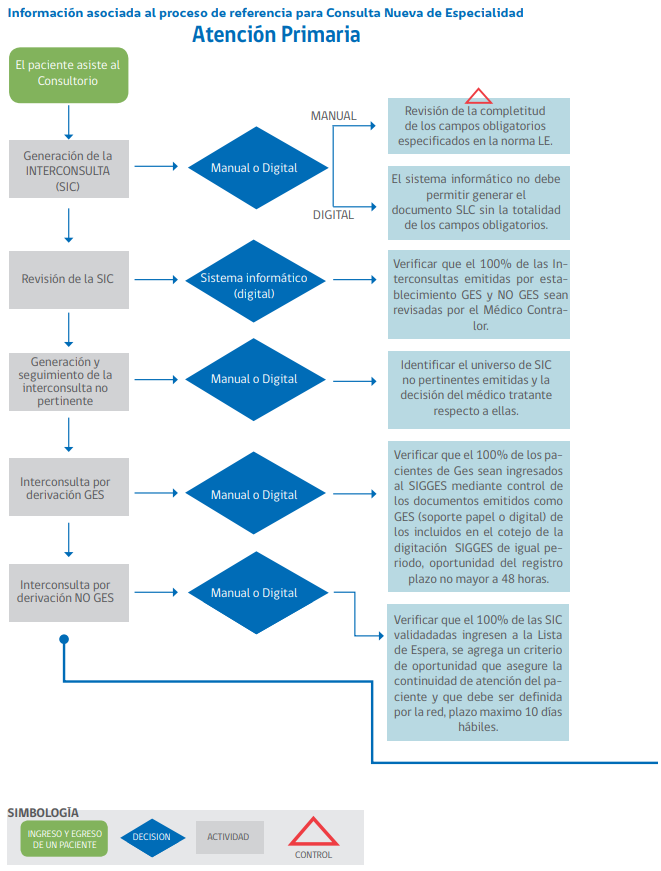

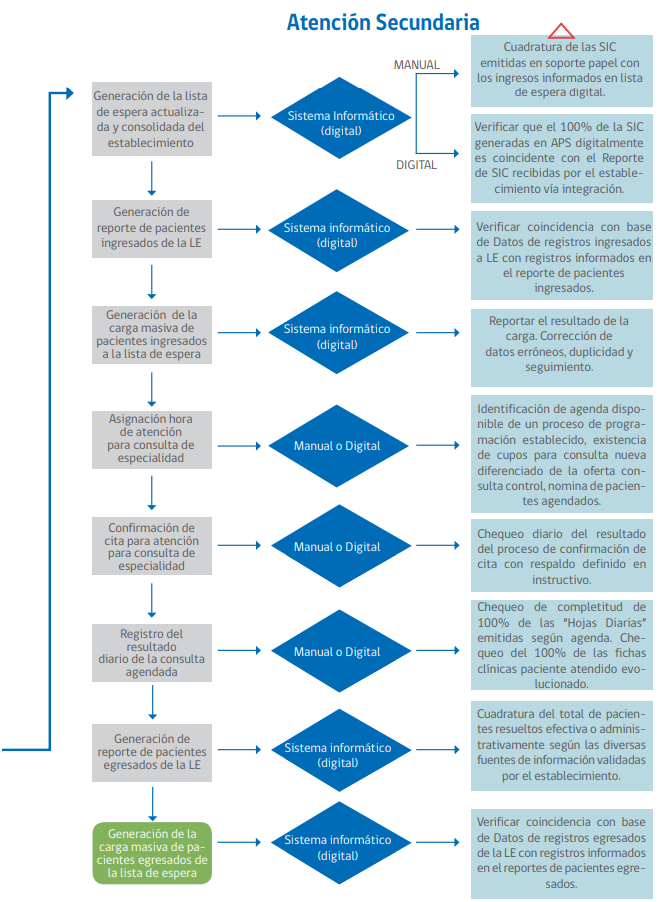

Una decisión que se debe tomar en atención primaria es a qué especialidad debe ser referido un paciente con una hipótesis diagnóstica espefífica. Para esto podría ayudarnos el Procesamiento de Lenguaje Natural y el Aprendizaje de Máquinas.

Importamos un conjunto de datos de texto libre que contiene una serie de diagnósticos y a la especialidad a la que está asociado.

In [16]:
diagnostics = pd.read_csv("data/diagnostics.csv")

In [17]:
diagnostics.sample(5)

,diagnostic,specialty
41987,Consulta no Especificada,OFTALMOLOGIA
2387,Consulta no Especificada,TRAUMATOLOGIA
6514,Sindrome del tunel carpiano,TRAUMATOLOGIA
40082,Sindrome de Sjögren (Sindrome de Sicca),OFTALMOLOGIA
5150,"Equinococosis, otra y la no especificada",TRAUMATOLOGIA


### Actividad 3

**Preprocesa los datos y entrena un modelo que clasifique el diagnóstico en una de las especialidades, además crea una función que reciba un diagnóstico arbitrario y lo clasifique usando el modelo.**

In [18]:
# Entrenamiento y evaluación de un modelo de clasificación de texto libre.
